Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
* See [Example Solution](Pyber/Pyber_Example.pdf) for a reference on expected format.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
# %matplotlib inline

In [3]:
city_path=os.path.join("Pyber","raw_data","city_data.csv")
ride_path=os.path.join("Pyber","raw_data","ride_data.csv")

In [4]:
df_d=pd.read_csv(city_path)
df_r=pd.read_csv(ride_path)

In [5]:
df_d.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [6]:
df_r.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


              Fare per City  Rides per City  driver_count      type
city                                                               
Alvarezhaven      23.928710              31            21     Urban
Alyssaberg        20.609615              26            67     Urban
Anitamouth        37.315556               9            16  Suburban
Antoniomouth      23.625000              22            21     Urban
Aprilchester      21.981579              19            49     Urban
              Fare per City  Rides per City  driver_count   type
city                                                            
Alvarezhaven      23.928710              31            21  Urban
Alyssaberg        20.609615              26            67  Urban
Antoniomouth      23.625000              22            21  Urban
Aprilchester      21.981579              19            49  Urban
Arnoldview        25.106452              31            41  Urban
note: the size of the bubble represents the fare price. the size of t

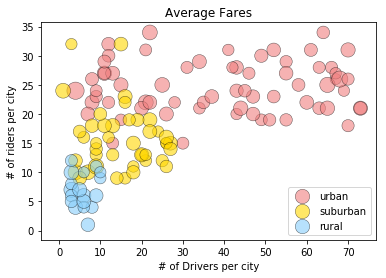

In [59]:
# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)
df_grp1=df_r.groupby("city")
s_grp1_avg=df_grp1.mean()["fare"]
s_grp1_rides=df_grp1["ride_id"].count()
df_grp1_drivers=df_d[["city","driver_count","type"]]


#merge tables
df_merge=pd.concat([s_grp1_avg, s_grp1_rides], axis=1)
df_merge=df_merge.rename(index=str, columns={"ride_id": "Rides per City", "fare":"Fare per City"})
merge_table = pd.merge(df_merge, df_grp1_drivers, right_on="city", left_index=True)
merge_table=merge_table.set_index('city')
print(merge_table.head())

df_urban=merge_table[merge_table["type"]=="Urban"]
df_subu=merge_table[merge_table["type"]=="Suburban"]
df_rural=merge_table[merge_table["type"]=="Rural"]
print(df_urban.head())


#plotting
# plt.figure(figsize=(50,10))
colors = ['lightcoral', 'gold', 'lightskyblue']

# urban = plt.scatter(random(10), random(10), marker='x', color=colors[0])
urban=plt.scatter(df_urban["driver_count"],df_urban["Rides per City"], s=merge_table["Fare per City"]*6, marker="o", facecolors=colors[0], alpha=0.6, label="urban", edgecolor="black",linewidths=0.5)
subu=plt.scatter(df_subu["driver_count"],df_subu["Rides per City"], s=merge_table["Fare per City"]*6, marker="o", facecolors=colors[1], alpha=0.6, label="suburban", edgecolor="black",linewidths=0.5)
rural=plt.scatter(df_rural["driver_count"],df_rural["Rides per City"], s=merge_table["Fare per City"]*6, marker="o", facecolors=colors[2], alpha=0.6, label="rural", edgecolor="black",linewidths=0.5)

plt.title("Average Fares")
plt.xlabel("# of Drivers per city")
plt.ylabel("# of riders per city")
plt.legend()

print("note: the size of the bubble represents the fare price. the size of the bubble is magnified by 6 times to show the difference in price.")

1623.8633900239768
1300.4339533158488
615.7285717893218


Text(0.5,1,'% of Total Fares by City Type')

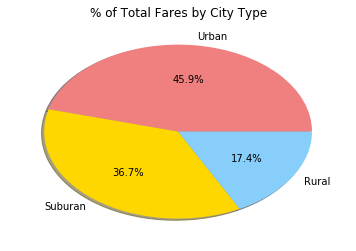

In [55]:
#Pie chart 1 - % of Total Fares by City Type

#calculate the total fare price by city type
urban_fare=df_urban["Fare per City"].sum()
subu_fare=df_subu["Fare per City"].sum()
rural_fare=df_rural["Fare per City"].sum()

print(urban_fare)
print(subu_fare)
print(rural_fare)


labels = ["Urban", "Suburan", "Rural"]
sizes = [urban_fare, subu_fare, rural_fare]
colors = ["lightcoral", "gold", "lightskyblue"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("% of Total Fares by City Type")

1625
657
125


Text(0.5,1,'% of Total Rides by City Type')

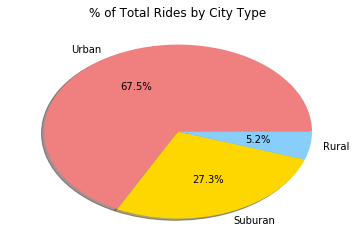

In [56]:
#Pie chart 1 - % of Total Rides by City Type
urban_r=df_urban["Rides per City"].sum()
subu_r=df_subu["Rides per City"].sum()
rural_r=df_rural["Rides per City"].sum()

print(urban_r)
print(subu_r)
print(rural_r)


labels = ["Urban", "Suburan", "Rural"]
sizes = [urban_r, subu_r, rural_r]
colors = ["lightcoral", "gold", "lightskyblue"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("% of Total Rides by City Type")

2607
638
104


Text(0.5,1,'% of Total Drivers by City Type')

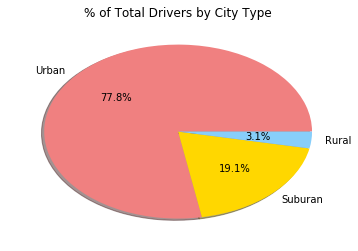

In [57]:
#Pie chart 1 - % of Total Drivers by City Type

urban_d=df_urban["driver_count"].sum()
subu_d=df_subu["driver_count"].sum()
rural_d=df_rural["driver_count"].sum()

print(urban_d)
print(subu_d)
print(rural_d)


labels = ["Urban", "Suburan", "Rural"]
sizes = [urban_d, subu_d, rural_d]
colors = ["lightcoral", "gold", "lightskyblue"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("% of Total Drivers by City Type")

In [61]:
'''
Three observable trends based on the data:
1) Based on the bubble plot, there are more urban riders and drivers than rural riders.
2) The fare prices are not significantly different: from ~$20-$50.
3) Although rural drivers are only 3.1%, they represent 17.4% of the total fare.
'''

'\nThree observable trends based on the data:\n\n1) Based on the bubble plot, there are more urban riders and drivers than rural riders.\n\n2) The fare prices are not significantly different: from ~$20-$50.\n\n3) Although rural drivers are only 3.1%, they represent 17.4% of the total fare.\n'